In [1]:
import os
import pandas as pd
%matplotlib inline
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
Bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

In [6]:
Bitcoin_news

{'status': 'ok',
 'totalResults': 3527,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'Learn how to invest in cryptocurrencies with this set of online classes',
   'description': "TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\n\nIf we're to believe every plot point from the movie The Social Network, Mark Zuckerberg allegedly stole the idea for Facebook from the Win…",
   'url': 'https://mashable.com/uk/shopping/june-25-cryptocurrency-bitcoin-investment-online-classes/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F06%252F25%252Fa2%252F8c1300ef96a34b55a583e5b71c7c8d77.f0fb3.jpg%252F1200x630.jpg?signature=W4X3KuJglXwJqcJZbdcJl49FXHo=',
   'publishedAt': '2020-06-25T04:30:00Z',
   'content': "TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot p

In [7]:
# Fetch the Ethereum news articles
Ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [8]:
Bitcoin_news['articles']

[{'source': {'id': 'mashable', 'name': 'Mashable'},
  'author': 'Joseph Green',
  'title': 'Learn how to invest in cryptocurrencies with this set of online classes',
  'description': "TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\n\nIf we're to believe every plot point from the movie The Social Network, Mark Zuckerberg allegedly stole the idea for Facebook from the Win…",
  'url': 'https://mashable.com/uk/shopping/june-25-cryptocurrency-bitcoin-investment-online-classes/',
  'urlToImage': 'https://mondrian.mashable.com/2020%252F06%252F25%252Fa2%252F8c1300ef96a34b55a583e5b71c7c8d77.f0fb3.jpg%252F1200x630.jpg?signature=W4X3KuJglXwJqcJZbdcJl49FXHo=',
  'publishedAt': '2020-06-25T04:30:00Z',
  'content': "TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot point from the movie The Social Network, Mark Z… [+2756 chars

In [9]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

In [10]:
Bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,TL;DR: The Complete Cryptocurrency Investment ...,2020-06-25,0.0000,0.000,0.000,1.000
1,The Winklevoss twinsthe brothers Mark Zuckerbe...,2020-06-09,0.0000,0.000,0.000,1.000
2,"Sparrow Exchange, a Bitcoin and Ethereum optio...",2020-06-23,0.0000,0.000,0.000,1.000
3,If youre planning to do some protesting and yo...,2020-06-04,-0.3464,0.046,0.134,0.819
4,"The threat of ransomware may seem ubiquitous, ...",2020-07-01,-0.4215,0.000,0.112,0.888


In [11]:
# Create the ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

In [12]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.241970,0.060050,0.018750,0.921200
std,0.358248,0.041562,0.045946,0.055972
min,-0.476700,0.000000,0.000000,0.797000
25%,0.000000,0.000000,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.932500
max,0.507000,0.090000,0.134000,1.000000


In [13]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.163338,0.054375,0.023563,0.922062
std,0.401906,0.055602,0.056523,0.075770
min,-0.670500,0.000000,0.000000,0.751000
25%,0.000000,0.000000,0.000000,0.862500
50%,0.113150,0.059000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,1.000000
max,0.731600,0.166000,0.184000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

Question 1 Answer- Bitcoin
Question 2 Answer- Ethereum
Question 3 Answer- Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Expand the default stopwords list if necessary

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words  # Convert the words to lowercase  # Remove the stop words     # Remove the punctuation
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    output = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in sw]
   

    
    # Lemmatize Words into root words
    
    return output


In [17]:
# Create a new tokens column for bitcoin
Bitcoin_df['tokenized']= [tokenizer(text)for text in Bitcoin_df.text]
Bitcoin_df

,text,date,compound,positive,negative,neutral,tokenized
0,TL;DR: The Complete Cryptocurrency Investment ...,2020-06-25,0.0000,0.000,0.000,1.000,"[tldr, complete, cryptocurrency, investment, b..."
1,The Winklevoss twinsthe brothers Mark Zuckerbe...,2020-06-09,0.0000,0.000,0.000,1.000,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,"Sparrow Exchange, a Bitcoin and Ethereum optio...",2020-06-23,0.0000,0.000,0.000,1.000,"[sparrow, exchange, bitcoin, ethereum, option,..."
3,If youre planning to do some protesting and yo...,2020-06-04,-0.3464,0.046,0.134,0.819,"[youre, planning, protesting, dont, want, risk..."
4,"The threat of ransomware may seem ubiquitous, ...",2020-07-01,-0.4215,0.000,0.112,0.888,"[threat, ransomware, may, seem, ubiquitous, ha..."
5,More posts by this contributor\r\nEditor’s not...,2020-06-24,0.0000,0.000,0.000,1.000,"[post, contributoreditors, note, andreessen, h..."
6,Bitcoin has always had the potential to become...,2020-06-08,0.0000,0.000,0.000,1.000,"[bitcoin, always, potential, become, world, st..."
7,LONDON (Reuters) - The number of people in Bri...,2020-06-30,-0.4767,0.075,0.129,0.797,"[london, reuters, number, people, britain, buy..."
8,Our robot colleague Satoshi Nakaboto writes ab...,2020-06-18,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
9,Our robot colleague Satoshi Nakaboto writes ab...,2020-06-09,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [18]:
# Create a new tokens column for ethereum
Ethereum_df['tokenized']= [tokenizer(text)for text in Ethereum_df.text]
Ethereum_df

,text,date,compound,positive,negative,neutral,tokenized
0,"Sparrow Exchange, a Bitcoin and Ethereum optio...",2020-06-23,0.0000,0.000,0.000,1.000,"[sparrow, exchange, bitcoin, ethereum, option,..."
1,Editor’s note:Andreessen HorowitzsCrypto Start...,2020-06-17,0.0000,0.000,0.000,1.000,"[editor, noteandreessen, horowitzscrypto, star..."
2,TL;DR: The Complete Cryptocurrency Investment ...,2020-06-25,0.0000,0.000,0.000,1.000,"[tldr, complete, cryptocurrency, investment, b..."
3,Our robot colleague Satoshi Nakaboto writes ab...,2020-06-08,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,For developers looking to quickly build identi...,2020-06-03,0.0000,0.000,0.000,1.000,"[developer, looking, quickly, build, identity,..."
5,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",2020-06-22,0.5574,0.137,0.000,0.863,"[introducing, webtorrentjune, today, excited, ..."
6,"Akron, Ohio, the hometown of LeBron James and ...",2020-06-15,0.0000,0.000,0.000,1.000,"[akron, ohio, hometown, lebron, james, seat, u..."
7,"When the inventor of AWS Lambda, Tim Wagner, a...",2020-07-01,0.2263,0.053,0.000,0.947,"[inventor, aws, lambda, tim, wagner, former, h..."
8,Imagine sending $133 to a friend and being cha...,2020-06-10,0.3400,0.089,0.050,0.861,"[imagine, sending, friend, charged, million, f..."
9,An IT support bod who reportedly stole more th...,2020-06-15,-0.5994,0.065,0.184,0.751,"[support, bod, reportedly, stole, bitcoin, lit..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(tokenizer(Bitcoin_df['text'].str.cat()), n=2))
print(dict(bigram_counts))

{('tldr', 'complete'): 1, ('complete', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'june'): 1, ('june', 'saving'): 1, ('saving', 'list'): 1, ('list', 'priceif'): 1, ('priceif', 'believe'): 1, ('believe', 'every'): 1, ('every', 'plot'): 1, ('plot', 'point'): 1, ('point', 'movie'): 1, ('movie', 'social'): 1, ('social', 'network'): 1, ('network', 'mark'): 1, ('mark', 'z'): 1, ('z', 'charsthe'): 1, ('charsthe', 'winklevoss'): 1, ('winklevoss', 'twinsthe'): 1, ('twinsthe', 'brother'): 1, ('brother', 'mark'): 1, ('mark', 'zuckerberg'): 1, ('zuckerberg', 'allegedly'): 1, ('allegedly', 'stole'): 1, ('stole', 'idea'): 1, ('idea', 'facebook'): 1, ('facebook', 'fromare'): 1, ('fromare', 'making'): 1, ('making', 'movie'): 1, ('movie', 'deadline'): 1, ('deadline', 'reported'): 1, ('reported', 'week'): 1, ('week', 'doesnt'): 1, ('doesnt', 'seem'): 1, ('seem', 'masturbatory'): 1, ('masturbatory', 'enough'): 1, ('enough', 'r')

In [21]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(tokenizer(Ethereum_df['text'].str.cat()), n=2))
print(dict(bigram_counts))

{('sparrow', 'exchange'): 1, ('exchange', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 1, ('ethereum', 'option'): 1, ('option', 'trading'): 1, ('trading', 'platform'): 1, ('platform', 'based'): 1, ('based', 'singapore'): 1, ('singapore', 'announced'): 1, ('announced', 'today'): 1, ('today', 'raised'): 1, ('raised', 'million'): 1, ('million', 'series'): 1, ('series', 'fundingthe'): 1, ('fundingthe', 'round'): 1, ('round', 'led'): 1, ('led', 'hdr'): 1, ('hdr', 'group'): 1, ('group', 'owner'): 1, ('owner', 'cry'): 1, ('cry', 'charseditors'): 1, ('charseditors', 'noteandreessen'): 1, ('noteandreessen', 'horowitzscrypto'): 1, ('horowitzscrypto', 'startup'): 1, ('startup', 'school'): 1, ('school', 'brought'): 1, ('brought', 'together'): 1, ('together', 'participant'): 1, ('participant', 'around'): 1, ('around', 'u'): 1, ('u', 'overseas'): 1, ('overseas', 'sevenweek'): 1, ('sevenweek', 'course'): 1, ('course', 'learn'): 1, ('learn', 'build'): 1, ('build', 'crypto'): 1, ('crypto', 'company'): 1, ('

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin
BTC_tokens = tokenizer(Bitcoin_df['text'].str.cat())
token_count(BTC_tokens)


[('bitcoin', 39),
 ('satoshi', 24),
 ('nakaboto', 24),
 ('every', 13),
 ('today', 13),
 ('charsour', 12),
 ('robot', 12),
 ('colleague', 12),
 ('writes', 12),
 ('btc', 12)]

In [24]:
# Get the top 10 words for Ethereum
ETH_tokens = tokenizer(Ethereum_df['text'].str.cat())
token_count(ETH_tokens)

[('bitcoin', 15),
 ('satoshi', 8),
 ('nakaboto', 8),
 ('today', 7),
 ('every', 5),
 ('charsour', 4),
 ('robot', 4),
 ('colleague', 4),
 ('writes', 4),
 ('btc', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

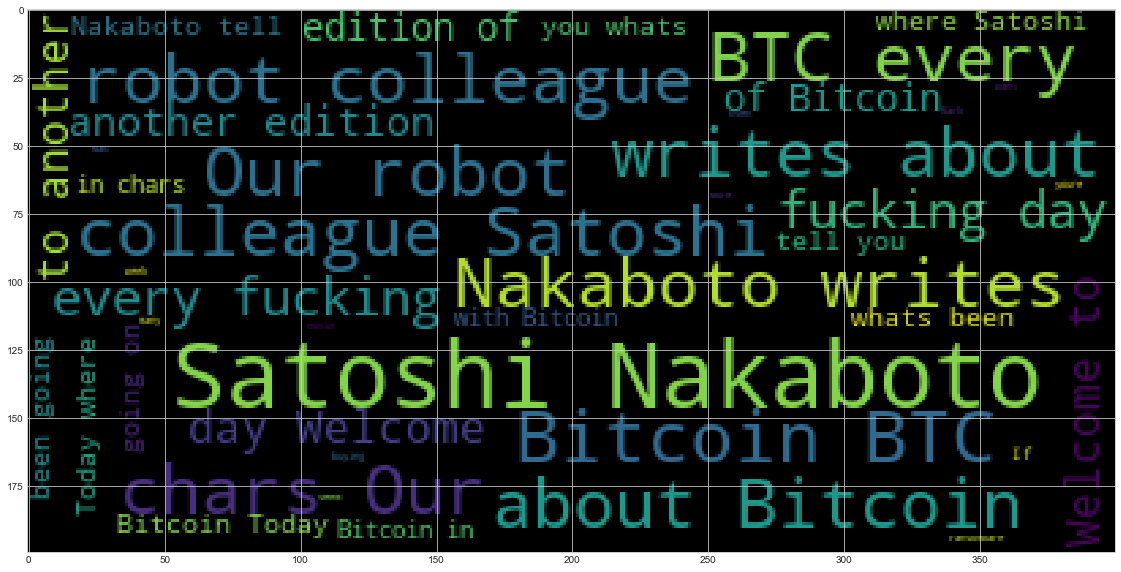

In [26]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(Bitcoin_df['text'].str.cat())
plt.imshow(wc)

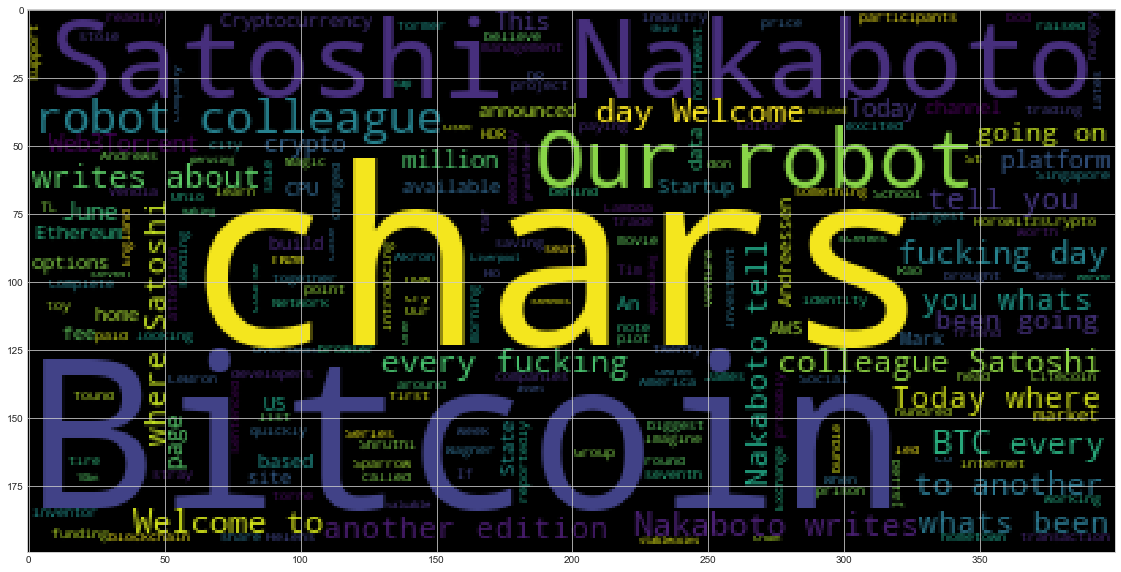

In [27]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(Ethereum_df['text'].str.cat())
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [33]:
# Concatenate all of the bitcoin text together
BTC_concat = Bitcoin_df['text'].str.cat()

In [34]:
# Run the NER processor on all of the text
doc = nlp(BTC_concat)
displacy.render(doc, style='ent')

# Add a title to the document


In [36]:
# Render the visualization
wc = WordCloud().generate(BTC_concat['text'].str.cat())
plt.imshow(wc)

TypeError: string indices must be integers

In [38]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
ETH_concat = Ethereum_df['text'].str.cat()

In [ ]:
# Run the NER processor on all of the text
doc = nlp(BTC_concat)
displacy.render(doc, style='ent')

# Add a title to the document

In [ ]:
# Render the visualization
wc = WordCloud().generate(Ethereum_df['text'].str.cat())
plt.imshow(wc)

In [37]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]